In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import cv2
from sklearn.preprocessing import StandardScaler
from umap import UMAP

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

# Carregar um conjunto de dados de exemplo (como CIFAR-10)
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


10000


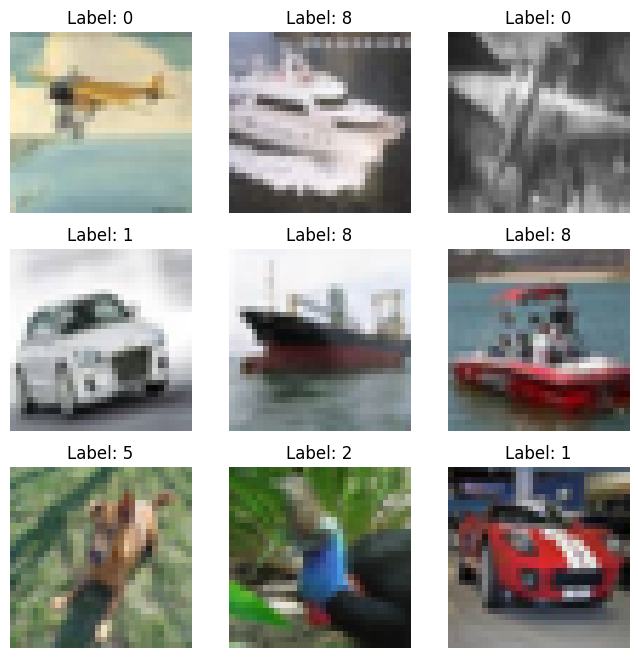

In [ ]:
print(len(dataset))

# Exibir algumas imagens do conjunto de dados
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
plt.show()

In [ ]:
def extract_features(img, method='hist'):

    # Convert the PyTorch tensor to a NumPy array
    img_ng = np.transpose(img.numpy(), (1, 2, 0))
    # img_ng = (img_ng * 255).astype(np.uint8)

    # img = cv2.imread(image_path)
    gray = cv2.cvtColor(img_ng, cv2.COLOR_BGR2GRAY)

    if method == 'hist':
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
        features = hist.flatten()
    elif method == 'hog':
        winSize = (64, 64)
        blockSize = (16, 16)
        blockStride = (8, 8)
        cellSize = (8, 8)
        nbins = 9
        hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)

        features = hog.compute(gray)
    else:
        raise ValueError("Método de extração não suportado.")

    return features

In [ ]:
# Criar um vetor de características para cada imagem
feature_vectors = []
labels = []
for i in range(min(1, len(dataset))):
    img, label = dataset[i]
    # Converter a imagem para um vetor de características
    feature_vector = extract_features(img, 'hist')
    # feature_vector = extract_features(img, 'hog')
    feature_vectors.append(feature_vector)
    labels.append(label)

# Converter a lista de vetores de características para um array numpy
feature_vectors = np.array(feature_vectors)

print(feature_vectors.shape) # Mostra a forma do array de vetores de características


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


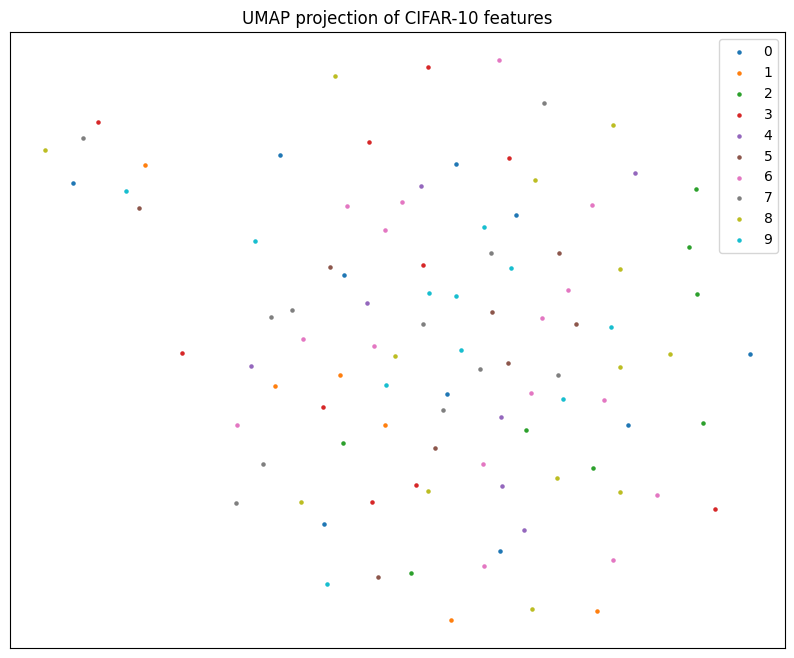

In [ ]:

# Converter a lista de vetores de características para um array numpy
feature_vectors = np.array(feature_vectors)
labels = np.array(labels)

# Aplicar o UMAP
reducer = UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(feature_vectors)

# Plotar o mapa UMAP com cores representando as classes
plt.figure(figsize=(10, 8))
for i in range(10):  # Assumindo 10 classes no CIFAR-10
    plt.scatter(embedding[labels == i, 0], embedding[labels == i, 1], label=str(i), s=5)
plt.legend()
plt.title('UMAP projection of CIFAR-10 features')
plt.xticks([])
plt.yticks([])
plt.show()